In [1]:
# Standard library imports
from pathlib import Path

# Data handling and preprocessing
import pandas as pd
import numpy as np

from preprocessing_utils import  get_data_paths
asset_path, data_path = get_data_paths()

SAVE = True

In [2]:
train_input_df = pd.read_csv(Path(asset_path, '03_train_input_padding.csv'))
train_elec_df  = pd.read_csv(Path(asset_path, '03_train_elec_padding.csv'))
train_meta_df  = pd.read_csv(Path(asset_path, '03_train_meta_padding.csv'))

test_input_df = pd.read_csv(Path(asset_path, '03_test_input_padding.csv'))
test_meta_df  = pd.read_csv(Path(asset_path, '03_test_meta_padding.csv'))

In [3]:
train_elec_df.head()

,sum_qctr_qt,sum_load_qt,avg_load_qt,n_mean_load_qt,elec_qt,sum_qctr,sum_load,avg_load,n_mean_load,elec
0,0.005005,0.006710,0.011380,0.006006,0.561784,6950,751.32,68.301818,68.606449,99.56
1,0.005005,0.004957,0.007892,0.006006,0.420938,6950,692.60,62.963636,68.606449,91.78
2,0.005005,0.002798,0.003555,0.006006,0.196547,6950,597.48,54.316364,68.606449,79.17
3,0.005005,0.001533,0.002271,0.006006,0.122398,6950,553.48,50.316364,68.606449,73.34
4,0.005005,0.000965,0.001619,0.006006,0.081348,6950,526.24,47.840000,68.606449,69.73


In [4]:
value = train_elec_df['elec'].values.reshape(-1)

# subsample 10000 points
value = np.random.choice(value, 300000)

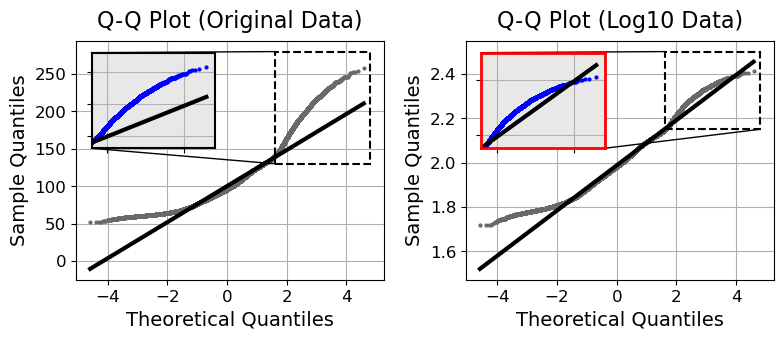

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.stats as stats
import numpy as np

def create_qq_plot(ax, data, title, x1, x2, y1, y2, edgecolor):
    res = stats.probplot(data, dist="norm", plot=ax)
    ax.get_lines()[0].set_markersize(2)
    ax.get_lines()[0].set_color('dimgrey')
    ax.get_lines()[1].set_color('black')
    ax.get_lines()[1].set_linewidth(3)
    ax.set_title(title, fontsize=16, y=1.02)
    ax.set_xlabel('Theoretical Quantiles', fontsize=14)
    ax.set_ylabel('Sample Quantiles', fontsize=14)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=12)

    axins = ax.inset_axes([0.05, 0.55, 0.4, 0.4], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
    axins.grid(True)
    axins.fill([x1, x2, x2, x1], [y1, y1, y2, y2], color='lightgray', alpha=0.5)
    axins.plot(res[0][0], res[0][1], 'o', markersize=2, color='blue')
    axins.plot(res[0][0], res[1][0] * res[0][0] + res[1][1], 'k-', linewidth=3)

    for spine in axins.spines.values():
        spine.set_edgecolor(edgecolor)
        spine.set_linewidth(1.5 if edgecolor == 'black' else 2.0)

    indicate = ax.indicate_inset_zoom(axins, edgecolor="black")
    indicate[0].set_linewidth(1.5)
    indicate[0].set_edgecolor('black')
    indicate[0].set_alpha(1.0)
    indicate[0].set_linestyle('--')
    for line in indicate[1]:
        line.set_linewidth(1.0)
        line.set_color('black')
        line.set_alpha(1.0)

# Figure와 Subplot 생성
fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

# 첫 번째 Q-Q plot (원본 데이터)
create_qq_plot(ax[0], value, 'Q-Q Plot (Original Data)', 1.6, 4.8, 130, 280, 'black')

# 두 번째 Q-Q plot (로그 변환 데이터)
create_qq_plot(ax[1], np.log10(value), 'Q-Q Plot (Log10 Data)', 1.6, 4.8, 2.15, 2.5, 'red')

# 레이아웃 조정
fig.tight_layout()
fig.savefig('../figure/qq_plot.png')


In [6]:
np.log10(train_elec_df['elec']).describe()

count    7.801200e+06
mean     1.987917e+00
std      1.024300e-01
min      1.689309e+00
25%      1.915611e+00
50%      1.981683e+00
75%      2.059526e+00
max      2.571779e+00
Name: elec, dtype: float64

____

In [7]:
input_cols = ['district_c0', 'district_c1', 'district_c2', 'district_c3', 'units_qt', 'lon_mm', 'lat_mm', 'holiday', 'altitude_mm', 'temp_st', 'humid_st', 'tchi_st', 'dci_st', 'hi_st', 'wchi_st', 'atemp_st', 'rain_qt', 'wind_mm']
elec_cols  = ['sum_qctr_qt', 'sum_load_qt', 'avg_load_qt', 'n_mean_load_qt', 'elec_qt', 'sum_qctr', 'sum_load', 'avg_load', 'n_mean_load', 'elec']
meta_cols  = ['is_dummy', 'num', 'year', 'datetime']

In [8]:
total_train_df = pd.concat([train_input_df[input_cols], train_elec_df[elec_cols], train_meta_df[meta_cols]], axis=1)
total_test_df = pd.concat([test_input_df[input_cols], test_meta_df[meta_cols]], axis=1)

total_train_df['datetime'] = pd.to_datetime(total_train_df['datetime'])
total_test_df['datetime']  = pd.to_datetime(total_test_df['datetime'])

In [9]:
total_train_df.head()

,district_c0,district_c1,district_c2,district_c3,units_qt,lon_mm,lat_mm,holiday,altitude_mm,temp_st,...,elec_qt,sum_qctr,sum_load,avg_load,n_mean_load,elec,is_dummy,num,year,datetime
0,0.0,0.0,0.0,1.0,0.066066,0.081734,0.0,1,0.369594,-1.332963,...,0.561784,6950,751.32,68.301818,68.606449,99.56,1,4821,2021,2020-12-22 00:00:00
1,0.0,0.0,0.0,1.0,0.066066,0.081734,0.0,1,0.449759,-1.321778,...,0.420938,6950,692.60,62.963636,68.606449,91.78,1,4821,2021,2020-12-22 01:00:00
2,0.0,0.0,0.0,1.0,0.066066,0.081734,0.0,1,0.504857,-1.332963,...,0.196547,6950,597.48,54.316364,68.606449,79.17,1,4821,2021,2020-12-22 02:00:00
3,0.0,0.0,0.0,1.0,0.066066,0.081734,0.0,1,0.527416,-1.388888,...,0.122398,6950,553.48,50.316364,68.606449,73.34,1,4821,2021,2020-12-22 03:00:00
4,0.0,0.0,0.0,1.0,0.066066,0.081734,0.0,1,0.513615,-1.388888,...,0.081348,6950,526.24,47.840000,68.606449,69.73,1,4821,2021,2020-12-22 04:00:00


In [10]:
npy_path = Path(data_path, 'NPZ')
npy_path.mkdir(parents=True, exist_ok=True)

train_npy_path = Path(npy_path, 'train')
train_npy_path.mkdir(parents=True, exist_ok=True)

test_npy_path = Path(npy_path, 'test')
test_npy_path.mkdir(parents=True, exist_ok=True)

In [11]:
train_first_occurrences = list(total_train_df.drop_duplicates(subset=['num', 'year'])[['num', 'year']].values)
test_first_occurrences  = list(total_test_df.drop_duplicates(subset=['num', 'year'])[['num', 'year']].values)

In [12]:
np.save(train_npy_path / 'num_year_order.npy', np.array(train_first_occurrences))
np.save(test_npy_path / 'num_year_order.npy', np.array(test_first_occurrences))

In [13]:
for num, year in train_first_occurrences:
    group = total_train_df[(total_train_df['num'] == num) & (total_train_df['year'] == year)]
    input = group[input_cols].values.astype(np.float32)
    elec = (np.log10(group['elec'].values) - 1.987533) / 0.1028064
    elec = np.asarray(elec, dtype=np.float32)
    datetime = group['datetime'].values
    is_dummy = group['is_dummy'].values
    is_dummy = np.asarray(is_dummy, dtype=np.bool_)

    filename = f'{num}_{year}.npz'
    np.savez(train_npy_path / filename, input=input, elec=elec, datetime=datetime, is_dummy=is_dummy)


In [14]:
for num, year in test_first_occurrences:
    group = total_test_df[(total_test_df['num'] == num) & (total_test_df['year'] == year)]
    input = group[input_cols].values.astype(np.float32)
    datetime = group['datetime'].values
    is_dummy = group['is_dummy'].values
    is_dummy = np.asarray(is_dummy, dtype=np.bool_)

    filename = f'{num}_{year}.npz'
    np.savez(test_npy_path / filename, input=input, datetime=datetime, is_dummy=is_dummy)